# Model explantation with SHAP (Shapley Additive explanations)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sys
from sklearn.ensemble import RandomForestClassifier
from joblib import load
%pip install shap
import shap

## Load data

In [ ]:
input_data = pd.read_excel('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/data/prepared/prepared_ICU_Prediction.xlsx')
ground_truth = input_data['ICU']
sample_data = input_data.drop('ICU', axis=1)
train_data, test_data, train_truth, test_truth = train_test_split(sample_data, ground_truth, test_size=0.2, shuffle=True, random_state=42)

## Load model

In [ ]:
best_model = load('/content/drive/MyDrive/TFG/implementations/machine_learning_tfg/notebooks/best_model/random_forest.joblib')
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Generate shap values and print results

In [ ]:
shap_values = shap.TreeExplainer(best_model).shap_values(train_data)

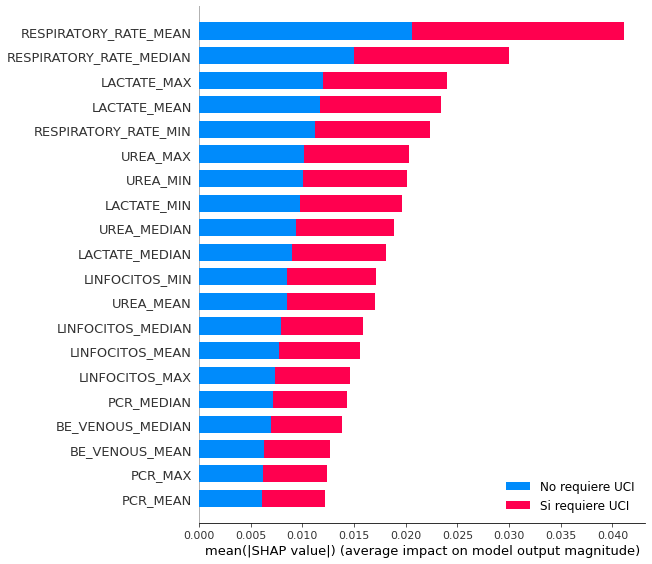

In [ ]:
shap.summary_plot(shap_values, train_data, class_names=['No requiere UCI','Si requiere UCI'])


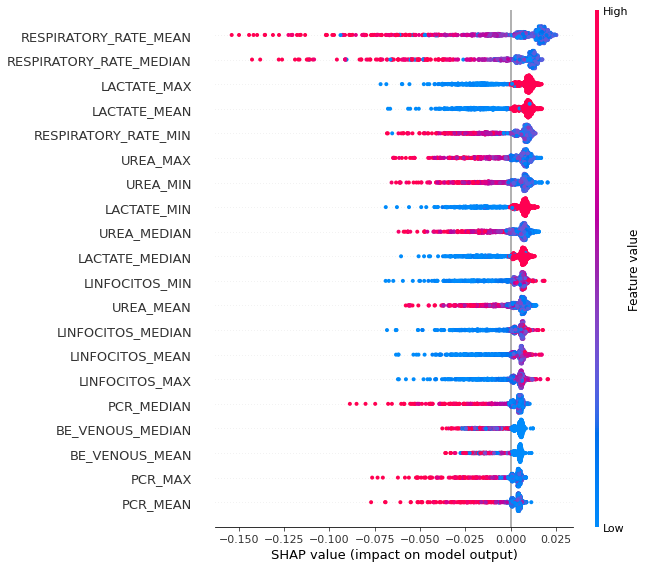

In [ ]:
shap.summary_plot(shap_values[0], train_data)

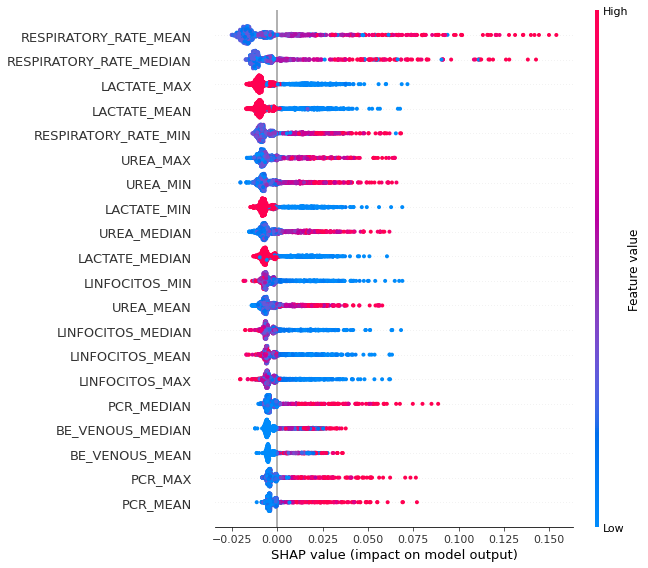

In [ ]:
shap.summary_plot(shap_values[1], train_data)

## Local explanation

In [ ]:
def show_local_explain(test_data_row):
  tree_explainer = shap.TreeExplainer(best_model)
  local_shap_values = tree_explainer.shap_values(test_data_row)
  return shap.force_plot(tree_explainer.expected_value[1], local_shap_values[1], test_data_row)




In [ ]:
shap.initjs()
show_local_explain(test_data.iloc[5])

In [ ]:
model_metrics_generator.predicted[5]

In [ ]:
shap.initjs()
show_local_explain(test_data.iloc[45])

In [ ]:
model_metrics_generator.predicted[45]

1